In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
wine = pd.read_csv('winequality-red.csv')
#test = pd.read_csv('winequality.csv')

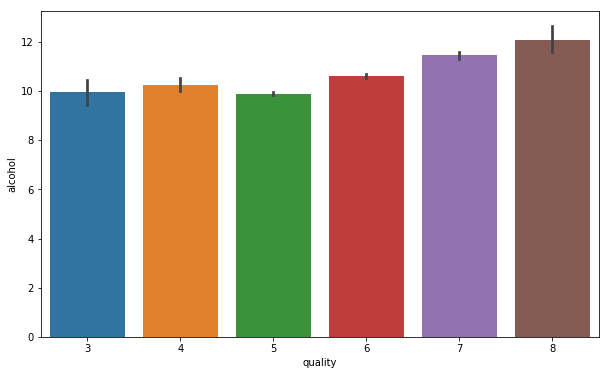

In [3]:
#try to visualize each features relevance with quality score
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [4]:
bins = [2,6,9] #Since max quality score is 8 and min quality score is 3, devide them reseasonably with the boundary of 6
quality_labels = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = quality_labels, include_lowest = True)

label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality']) #assign "bad" 0 and "good" 1

In [6]:
#test['quality'] = pd.cut(test['quality'], bins = bins, labels = quality_labels, include_lowest = True)

label_quality = LabelEncoder()
#test['quality'] = label_quality.fit_transform(test['quality']) #assign "bad" 0 and "good" 1

In [7]:
#data preprocessing
X = wine.drop('quality', axis = 1)
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [8]:
#data preprocessing
#X = wine.drop('quality', axis = 1)
#y = wine['quality']
#X_train = X
#y_train = y

#X_test = test.drop(['quality','good','color'],axis = 1)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#y_test = test['quality']

In [14]:
#Random Forest
rfc = RandomForestClassifier(n_estimators=35)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       287
           1       0.74      0.61      0.67        33

   micro avg       0.94      0.94      0.94       320
   macro avg       0.85      0.79      0.82       320
weighted avg       0.93      0.94      0.93       320

[[280   7]
 [ 13  20]]


In [15]:
#Stochastic Gradient Descent
sgd = SGDClassifier(loss = 'squared_hinge',penalty='none')
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       287
           1       0.39      0.48      0.43        33

   micro avg       0.87      0.87      0.87       320
   macro avg       0.66      0.70      0.68       320
weighted avg       0.88      0.87      0.87       320

[[262  25]
 [ 17  16]]


C:\Users\tsofr\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [11]:
#Finding best parameters for SVC model
svc = SVC()
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}

In [16]:
#Support Vector Classifier
svc = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       287
           1       0.88      0.45      0.60        33

   micro avg       0.94      0.94      0.94       320
   macro avg       0.91      0.72      0.78       320
weighted avg       0.93      0.94      0.93       320

[[285   2]
 [ 18  15]]
